In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
files=os.listdir(r'drive/MyDrive/Colab Notebooks/Final Project/uber')
files

['uber-raw-data-aug14.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-janjune-15.csv',
 'Uber-Jan-Feb-FOIL.csv']

In [ ]:
files.remove('uber-raw-data-janjune-15.csv')
files.remove('Uber-Jan-Feb-FOIL.csv')

In [ ]:
files

['uber-raw-data-aug14.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [ ]:
# Mengimpor seluruh file dalam folder menggunakan looping
path=r'drive/MyDrive/Colab Notebooks/Final Project/uber'

#blank dataframe
final=pd.DataFrame()

for file in files:
  df=pd.read_csv(path+"/"+file,encoding='utf-8')
  final=pd.concat([df,final])

In [ ]:
# Mengcopy dataframe
df=final.copy()
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [ ]:
# Mengubah tipe Date/Time menjadi tipe datetime64

df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")

In [ ]:
# Split column Date/Time menjadi 5 column

df['weekday']=df['Date/Time'].dt.day_name()
df['day']=df['Date/Time'].dt.day
df['minute']=df['Date/Time'].dt.minute
df['month']=df['Date/Time'].dt.month
df['hour']=df['Date/Time'].dt.hour

df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int32
minute                int32
month                 int32
hour                  int32
dtype: object

In [ ]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


# **Analisa 1: Tampilkan kepadatan traffic uber berdasarkan jam dan anam hari kerja**

In [ ]:
def count_rows(rows):
  return len(rows)

In [ ]:
by_cross = df.groupby(['weekday','hour']).apply(count_rows)
by_cross

weekday    hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
                   ...  
Wednesday  19      47017
           20      47772
           21      44553
           22      32868
           23      18146
Length: 168, dtype: int64

In [ ]:
pivot=by_cross.unstack()
pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


<Axes: xlabel='hour', ylabel='weekday'>

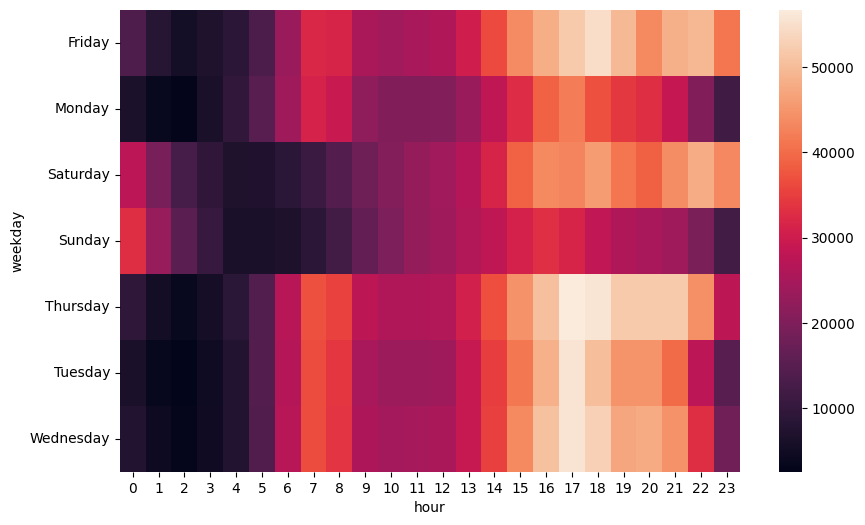

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=False)

In [ ]:
def heatmap(col1,col2):
  by_cross = df.groupby([col1,col2]).apply(lambda x:len(x))
  pivot=by_cross.unstack()
  return sns.heatmap(pivot,annot=False)

<Axes: xlabel='month', ylabel='day'>

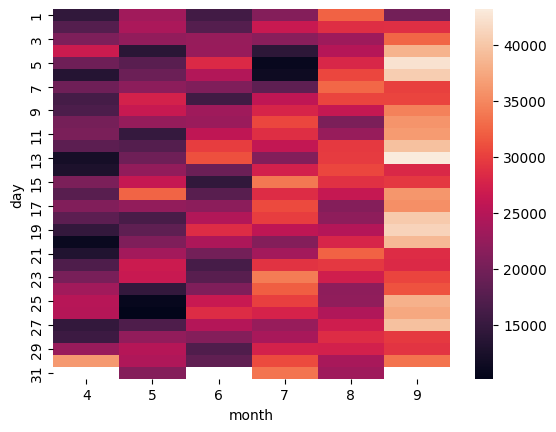

In [ ]:
heatmap('day','month')

In [ ]:
df[df['month']==4]

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0
...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday,30,22,4,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday,30,26,4,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday,30,31,4,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday,30,32,4,23


In [ ]:
df = df[df['month']==4]

<Axes: xlabel='month', ylabel='weekday'>

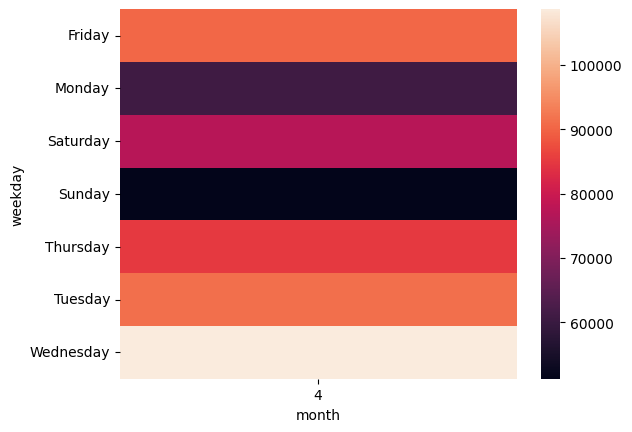

In [ ]:
heatmap('weekday','month')

# **Ananlisa 2: Mapping kepadatan traffic uber berdasarkan lokasi(Lat,Lang)**

(40.6, 41.0)

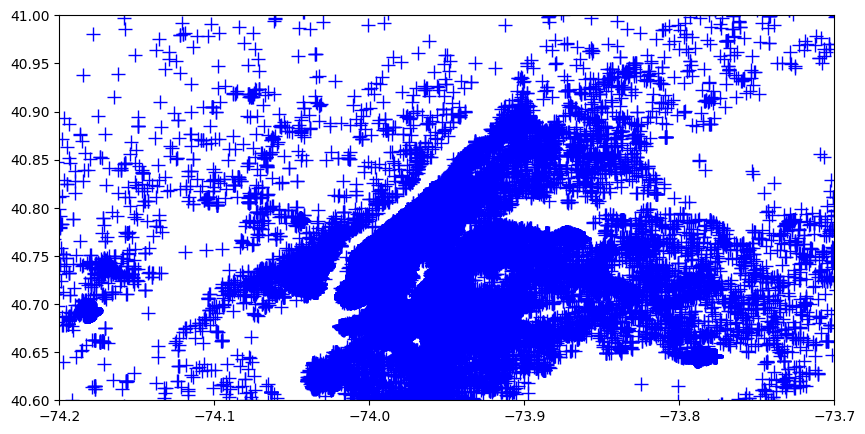

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(df['Lon'], df['Lat'],'b+', ms=10)
plt.xlim(-74.2, -73.7)
plt.ylim(40.6,41)

In [ ]:
df_out=df[df['weekday']=='Sunday']
df_out.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
6965,2014-04-06 00:00:00,40.6547,-74.3033,B02512,Sunday,6,0,4,0
6966,2014-04-06 00:00:00,40.7356,-74.0006,B02512,Sunday,6,0,4,0
6967,2014-04-06 00:00:00,40.7421,-74.0041,B02512,Sunday,6,0,4,0
6968,2014-04-06 00:00:00,40.7401,-74.0053,B02512,Sunday,6,0,4,0
6969,2014-04-06 00:01:00,40.7368,-73.9877,B02512,Sunday,6,1,4,0


In [ ]:
from folium.plugins import HeatMap
import folium
from folium.plugins import HeatMap
basemap=folium.Map()

In [ ]:
HeatMap(df_out.groupby(['Lat','Lon'])['weekday'].count().reset_index(),zoom=20,radius=15).add_to(basemap)
basemap

In [ ]:
def plot_heatmap(df,day):
  df_out=df[df['weekday']==day]
  HeatMap(df_out.groupby(['Lat','Lon'])['weekday'].count().reset_index(),zoom=20,radius=15).add_to(basemap)
  return basemap

In [ ]:
plot_heatmap(df,'monday')

# **Assignment 1**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('drive/MyDrive/Colab Notebooks/Final Project/uber/uber-raw-data-janjune-15.csv')

In [ ]:
df1


,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186
14270475,B02765,2015-05-08 15:43:00,B02765,263
14270476,B02765,2015-05-08 15:43:00,B02765,90
14270477,B02765,2015-05-08 15:44:00,B01899,45


In [ ]:
df1.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [ ]:
# 1. Tampilkan tanggal pickup date terkecil

tanggal_terkecil = df1['Pickup_date'].min()
print("Tanggal pickup terkecil:", tanggal_terkecil)


Tanggal pickup terkecil: 2015-01-01 00:00:05


In [ ]:
# 2. Tampilkan tanggal pickup data terbeasae

tanggal_terbesar = df1['Pickup_date'].max()
print("Tanggal pickup terbesar:", tanggal_terbesar)


Tanggal pickup terbesar: 2015-06-30 23:59:00


In [ ]:
# 3. Ubah Pickup_date ke datetime

df1['Pickup_date'] = pd.to_datetime(df1['Pickup_date'], format="%Y-%m-%d %H:%M:%S")

# Split column Pickup_date menjadi 6 column

df1['weekday']=df1['Pickup_date'].dt.day_name()
df1['day']=df1['Pickup_date'].dt.day
df1['minute']=df1['Pickup_date'].dt.minute
df1['month']=df1['Pickup_date'].dt.month
df1['hour']=df1['Pickup_date'].dt.hour
df1['second']=df1['Pickup_date'].dt.second

In [ ]:
df1.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,weekday,day,minute,month,hour,second
0,B02617,2015-05-17 09:47:00,B02617,141,Sunday,17,47,5,9,0
1,B02617,2015-05-17 09:47:00,B02617,65,Sunday,17,47,5,9,0
2,B02617,2015-05-17 09:47:00,B02617,100,Sunday,17,47,5,9,0
3,B02617,2015-05-17 09:47:00,B02774,80,Sunday,17,47,5,9,0
4,B02617,2015-05-17 09:47:00,B02617,90,Sunday,17,47,5,9,0


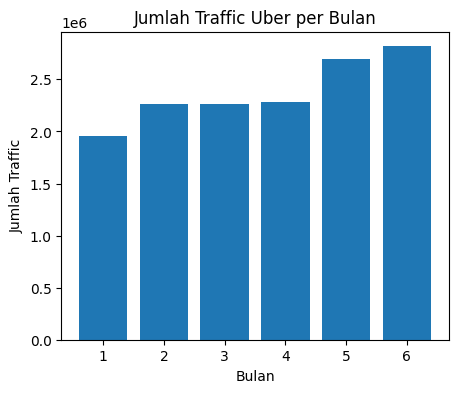

In [ ]:
# 4. Tampilkan grafic bar jumlah traffic uber per bulannya
plt.figure(figsize=(5,4))
plt.bar(x=df1['month'].value_counts().index, height=df1['month'].value_counts().values)
plt.title('Jumlah Traffic Uber per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Traffic')
plt.show()

In [ ]:
# 5. Tampilkan jumlah traffic uber setiap jamnya

hourly_traffic = df1['hour'].value_counts().sort_index()
hourly_traffic

hour
0      602178
1      394510
2      260603
3      183655
4      173038
5      193523
6      288533
7      443543
8      583348
9      593437
10     520092
11     516716
12     533021
13     537909
14     584463
15     649414
16     737170
17     863990
18     987093
19    1007464
20     948574
21     930462
22     922954
23     814789
Name: count, dtype: int64

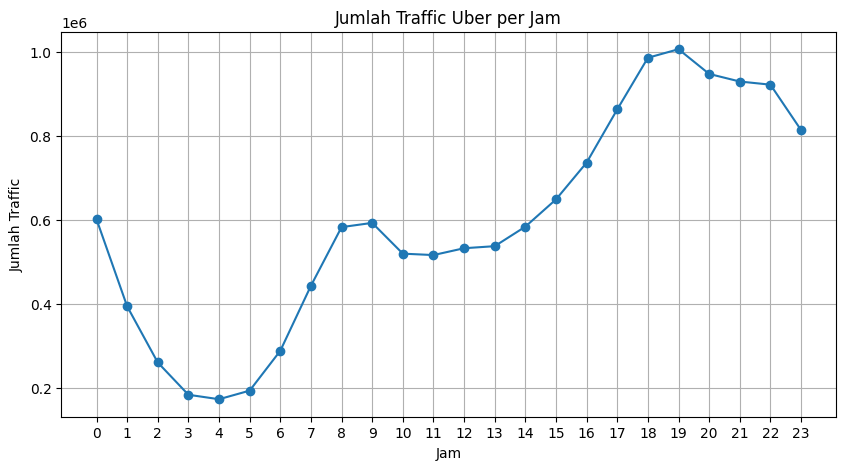

In [ ]:
# Membuat plot
plt.figure(figsize=(10, 5))
plt.plot(hourly_traffic.index, hourly_traffic.values, marker='o', linestyle='-')
plt.title('Jumlah Traffic Uber per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Traffic')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'hour vs weekday')

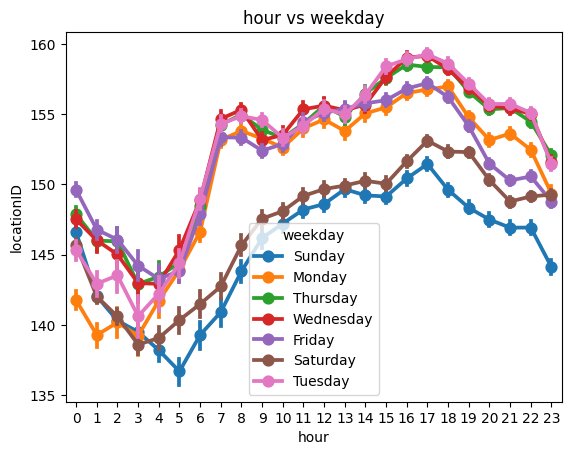

In [ ]:
# 6. Melihat perbedaan pola traffic uber per jamnya untuk tiap hari yang berbeda dalam seminggu dan Tampilkan Pointplotnya

ax=sns.pointplot(x="hour",y="locationID",hue="weekday",data=df1)
ax.set_title('hour vs weekday')

Berdasarkan analisa diatas dapat disimpulkan bahwa:
1. Traffic uber pada hari kerja lebih tinggi dibandingkan pada saat akhir pekan
2. Traffic uber terendah terjadi pada jam 3-5 pagi setiap harinya
3. Puncak traffic uber terjadi pada jam 5-6 sore

# **Assignment 2 **

In [ ]:
df2 = pd.read_csv('drive/MyDrive/Colab Notebooks/Final Project/uber/Uber-Jan-Feb-FOIL.csv')
df2.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [ ]:
df2.dtypes

In [ ]:
df2.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [ ]:
# 1. Tampilkan list basenumber yang tersedia

basenumbers = df2['dispatching_base_number'].unique()
print(basenumbers)


['B02512' 'B02765' 'B02764' 'B02682' 'B02617' 'B02598']


In [ ]:
# 2. Tampilkan basenumber paling banyak kendaraan aktif

# Menghitung jumlah kendaraan aktif untuk setiap basenumber
active_vehicles_per_base = df2.groupby('dispatching_base_number')['active_vehicles'].sum().sort_values()
data = active_vehicles_per_base.to_frame().reset_index()

In [ ]:
data

,dispatching_base_number,active_vehicles
0,B02512,13125
1,B02765,22575
2,B02598,58653
3,B02682,71431
4,B02617,79758
5,B02764,217290


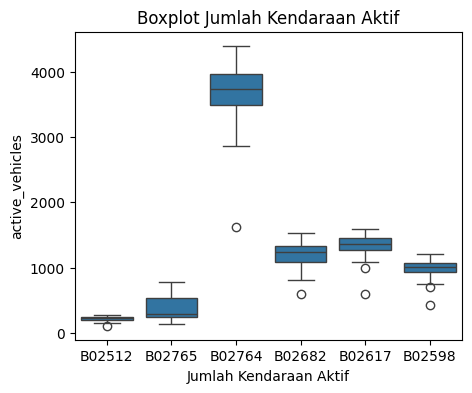

In [ ]:
# Membuat boxplot
plt.figure(figsize=(5, 4))
sns.boxplot(y=df2['active_vehicles'],x=df2['dispatching_base_number'])
plt.xlabel('Jumlah Kendaraan Aktif')
plt.title('Boxplot Jumlah Kendaraan Aktif')
plt.show()


In [ ]:
# 3. Tampilkan jumlah perjalanan dari masing-masing basenumber
trips_per_base = df2.groupby('dispatching_base_number')['trips'].sum().sort_values()
trips_per_base.to_frame().reset_index()

,dispatching_base_number,trips
0,B02512,93786
1,B02765,193670
2,B02598,540791
3,B02682,662509
4,B02617,725025
5,B02764,1914449


In [ ]:
# 4. Analisa berapa rata-rata jumlah perjalanan per kendaraan berdasarkan tanggal

df2['day'] = pd.to_datetime(df2['date']).dt.day
df2['average_trips_per_vehicles'] = df2['trips'] / df2['active_vehicles']
df2_grouped = df2.groupby('day')['average_trips_per_vehicles'].mean().to_frame().rename_axis('index1').reset_index()

df2_grouped.columns = ['Day', 'Average Trips']

df2_grouped.sort_values(by = 'Average Trips', ascending=False)

,Day,Average Trips
30,31,10.756768
23,24,9.458129
14,15,9.428925
29,30,9.328071
13,14,9.253936
17,18,9.239905
12,13,9.061638
20,21,9.053560
9,10,8.990540
16,17,8.819881


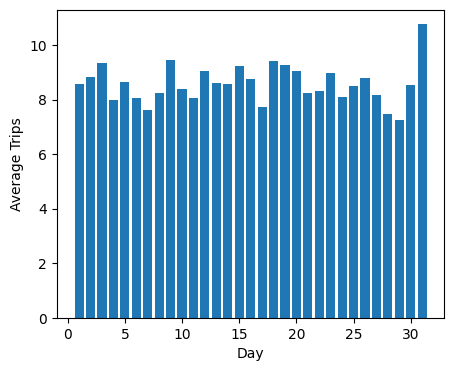

In [ ]:
plt.figure(figsize=(5,4))
plt.bar(x=df2_grouped['Day'].value_counts().index, height=df2_grouped['Average Trips'].values)
plt.xlabel('Day')
plt.ylabel('Average Trips')
plt.show()

Berdasarkan analisa diatas, rata-rata perjalanan per kendaraan aktif tertinggi terdapat pada tanggal 31 dengan jumlah mencapai 10.75 perjalanan, sedangkan rata-rata perjalana terendah terdapat pada tanggal 4 yakni dengan jumlah 7.26